In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eps = np.finfo(float)
eps

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

# Evaluating an expression carefully

Consider the following _complicated_ expression:

$$ b(u) = \frac{1}{u^3} \sqrt{ (4 + u^4) \sqrt{1+ u^4} - 3 u^4 - 4)} $$

Notice what happens when we try a naive evaluation of the expression

In [3]:
u = np.arange(0, 0.3, 0.000001)
b_naive = lambda u: 1/u**3 * np.sqrt( (4 + u**4) * np.sqrt( 1+ u**4) - 3*u**4 - 4)
a_naive = lambda u: np.multiply(np.divide(np.sqrt(2),np.power(u, 3)),(1-np.sqrt(1+np.power(u,4))))

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


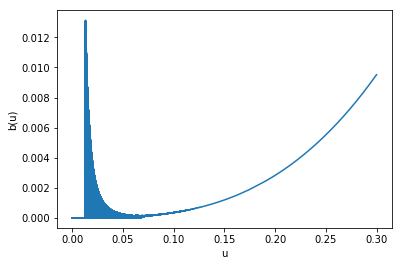

In [4]:
plt.plot(u, b_naive(u))
plt.xlabel('u')
plt.ylabel('b(u)')

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


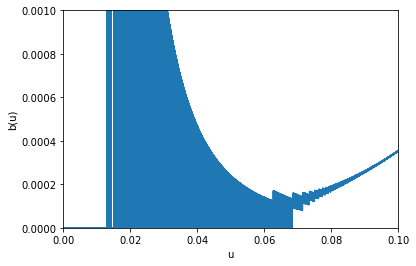

In [5]:
plt.plot(u, b_naive(u))
plt.xlim([0,0.1])
plt.ylim([0,1e-3])
plt.xlabel('u')
plt.ylabel('b(u)')

The bizarre behaviour of $b(u)$ is due to round-off error.

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


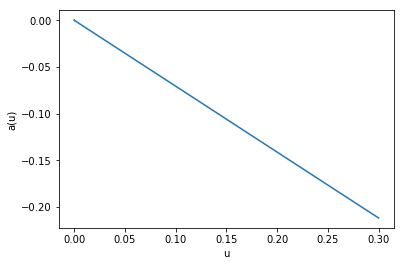

In [6]:
plt.plot(u, a_naive(u))
plt.xlabel('u')
plt.ylabel('a(u)')

### Taylor series

Taylor series can help us a lot in this situation and SymPy can help us determine those coefficients. 

In [7]:
import sympy as sp
sp.init_printing()

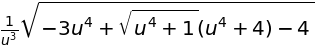

In [8]:
b_expression = sp.S('1/ u^3 * sqrt( (4 + u^4) * sqrt(1+ u^4)-3*u^4-4) ')
b_expression

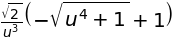

In [9]:
a_expression = sp.S('sqrt(2)/u**3*(1-sqrt(1+u**4))')
a_expression

In [10]:
b23_series = sp.series(b_expression, n=23)
b27_series = sp.series(b_expression, n=27)
b31_series = sp.series(b_expression, n=31)
b35_series = sp.series(b_expression, n=35)

In [11]:
b23 = sp.lambdify('u', b23_series.removeO())
b27 = sp.lambdify('u', b23_series.removeO())
b31 = sp.lambdify('u', b23_series.removeO())
b35 = sp.lambdify('u', b23_series.removeO())

In [12]:
a_series = sp.series(a_expression, n=20)

In [13]:
a_taylor = sp.lambdify('u', a_series.removeO())

In [14]:
u = np.arange(0.1, 1.1, 0.0001)

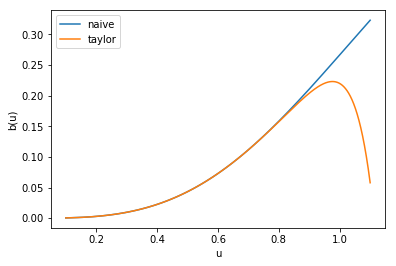

In [15]:
plt.plot(u, b_naive(u), label='naive')
plt.plot(u, b23(u), label='taylor')
plt.xlabel('u')
plt.ylabel('b(u)')
plt.legend()

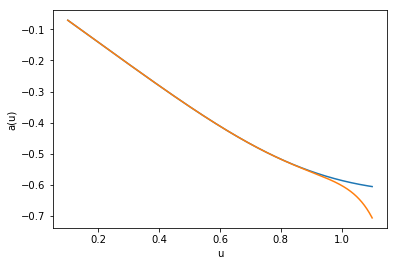

In [16]:
plt.plot(u, a_naive(u), label='naive')
plt.plot(u, a_taylor(u), label='taylor')
plt.xlabel('u')
plt.ylabel('a(u)')

### Considering the absolute difference

In [17]:
u = np.arange(0.5, 0.501, 0.0000001)

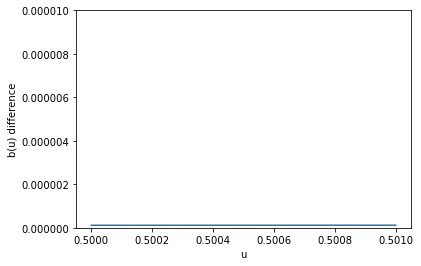

In [18]:
plt.plot(u, b_naive(u) - b23(u))
#plt.yscale('log')
plt.xlabel('u')
plt.ylabel('b(u) difference')
plt.ylim(0, 1e-5)

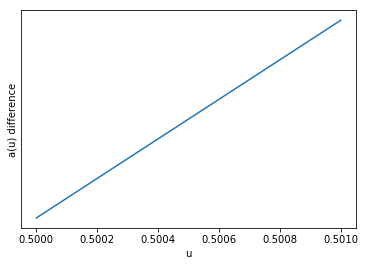

In [19]:
plt.plot(u, a_naive(u) - a_taylor(u))
plt.yscale('log')
plt.xlabel('u')
plt.ylabel('a(u) difference')
#plt.ylim(0, 1e-9)

## Horner

In [55]:
q = sp.symbols('q')
ftest0 = np.sqrt(2)*(1/4*q**3 - 3/32*q**7 + 27/512*q**11 - 143/4096*u**15 + 3315/131072*u**19 - 20349/1048576*u**23\
                    + 260015/16777216*u**27 + 1803513/134217728*u**31)
ftest = sp.horner(ftest0)

In [56]:
ftest

In [57]:
b_horner = lambda u: u**3*(u**4*(0.0745776683282687*u**4 - 0.132582521472478) + 0.353553390593274) - 4.93696020934508e-17

In [58]:
b_horner(0.01)

In [59]:
u_start = 0.0; u_inc = 0.0001; u_end = 1.0 + u_inc
u = np.arange(u_start, u_end, u_inc)

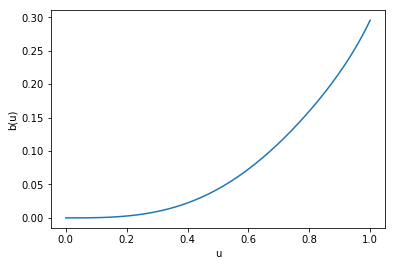

In [60]:
plt.plot(u, b_horner(u))
plt.xlabel('u')
plt.ylabel('b(u)')

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


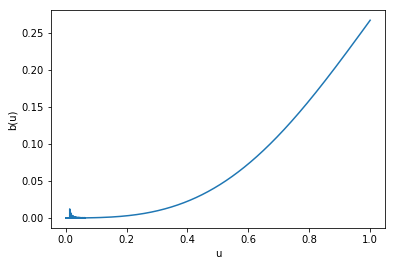

In [61]:
plt.plot(u, b_naive(u))
plt.xlabel('u')
plt.ylabel('b(u)')

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


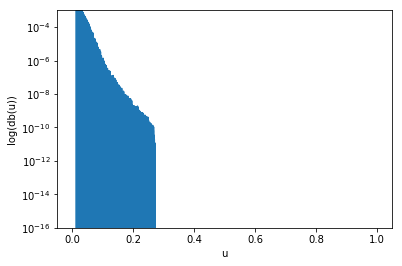

In [66]:
plt.plot(u, b_naive(u) - b_horner(u))
plt.yscale('log')
plt.ylim([1e-16,1e-3])
plt.xlabel('u')
plt.ylabel('log(db(u))')

## Reading in actual computations

Since the implementation of the horner formula for u > 0.3 does not produce as accurate results as implementinthe horner formula for u > 0.6, it is likely that there is a difference in the way MATLAB and python are computing output using the b function.

In [20]:
import scipy.io as sio

In [21]:
modelfull = 'ECCO_20th'
root = '/home/evankielley/IceDEF/WagnerModel'                           
outloc = root + '/output/' + modelfull + '/'
inFile = outloc + 'b_arr.mat'                                     
b_mat = sio.loadmat(inFile)['b_arr'];

In [22]:
u_start = 0.01; u_inc = 0.00001; u_end = 1.0 + u_inc 
u_range = np.arange(u_start,u_end,u_inc)
u_linspace = np.linspace(u_start,u_end,u_inc)

b_py = np.empty([len(u_range), 3])*np.nan

u = u_start
for  i in range(0,len(u_range)):
    b_py[i,:] = u, b_naive(u), b35(u)
    u = u + u_inc;

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


In [26]:
b_diff = b_mat - b_py

<function matplotlib.pyplot.show>

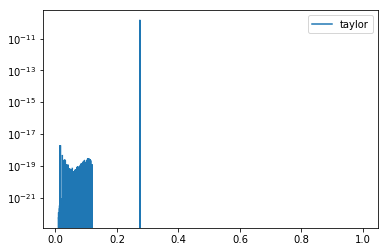

In [27]:
#plt.plot(b_py.T[0,:],np.divide(b_diff[:,1],b35(u)),label='naive')
#plt.plot(b_py.T[0,:],np.divide(b_diff[:,2],b35(u)),label='taylor')
plt.plot(b_py.T[0,:],b_diff[:,1]-b_diff[:,2],label='taylor')

#plt.ylim([0,1e-10])
#plt.xlim([0.2,0.4])
plt.legend()
plt.yscale('log')
plt.show